# Easi, NK cell annotations, protein markers

In this notebook surface protein markers for NK cells are tested. UMAPs are generated using latent space coordinates. DSB normalized proteins counts are visualized in UMAPs.  

Used NK cell markers are selected based on recent papers and documentation of Mustjoki group;

- Pfefferle, A., et al. (2019). A Temporal Transcriptional Map of Human Natural Killer Cell Differentiation. BioRxiv, 630657. https://doi.org/10.1101/630657
- Melsen, J. E., et al. (2022). Single-cell transcriptomics in bone marrow delineates CD56dimGranzymeK+ subset as intermediate stage in NK cell differentiation. Frontiers in immunology, 13, 1044398. https://doi.org/10.3389/fimmu.2022.1044398
- Yang, C., et al.(2019). Heterogeneity of human bone marrow and blood natural killer cells defined by single-cell transcriptome. Nature communications, 10(1), 3931. https://doi.org/10.1038/s41467-019-11947-7
- Neurips documentation

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scvi
import scanpy as sc
import umap

from ridgeplot import ridgeplot

import warnings

warnings.filterwarnings('ignore')

In [94]:
#Easigenomics dataset

adata = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/adata_easi_norm.h5ad')


In [95]:
adata.obs['batch_group'] 

AAACCTGAGCCCTAAT-1-100    Easi
AAACCTGCAAGCCGCT-1-100    Easi
AAACCTGCACTGTCGG-1-100    Easi
AAACCTGCAGACGCTC-1-100    Easi
AAACCTGTCCTTAATC-1-100    Easi
                          ... 
TTTGTCAGTACATCCA-1-158    Easi
TTTGTCAGTAGGCATG-1-158    Easi
TTTGTCAGTATGCTTG-1-158    Easi
TTTGTCATCAAACCAC-1-158    Easi
TTTGTCATCCATGAAC-1-158    Easi
Name: batch_group, Length: 121340, dtype: category
Categories (1, object): ['Easi']

In [96]:
adata

AnnData object with n_obs × n_vars = 121340 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    obsp: 'connectivities', 'distances'

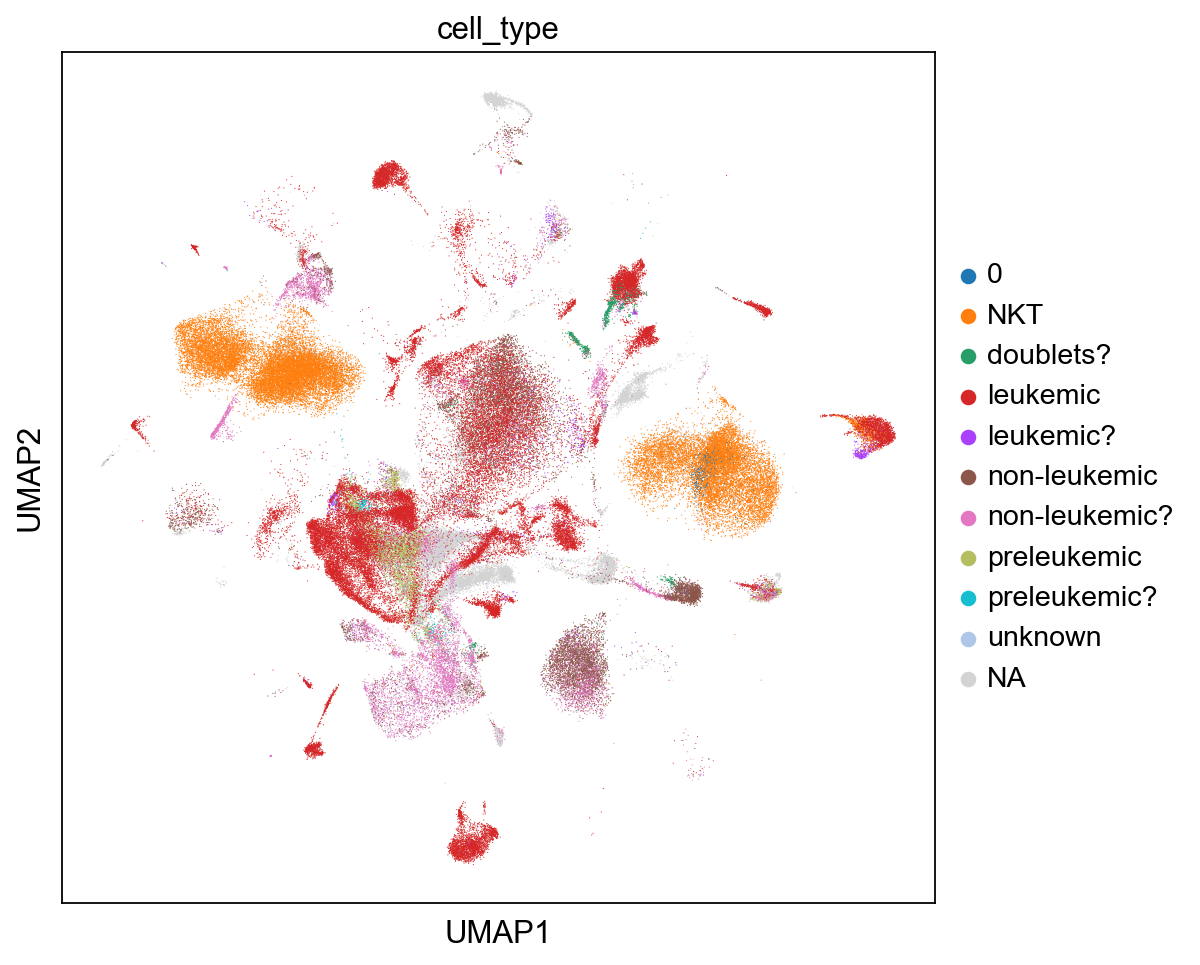

In [97]:
#latent space?

sc.pl.umap(adata, color = ['cell_type'], color_map = 'viridis')

In [98]:
adata.obs['cell_type'].unique().tolist()

['NKT',
 'non-leukemic',
 'preleukemic',
 'non-leukemic?',
 nan,
 'leukemic',
 'leukemic?',
 'doublets?',
 'unknown',
 '0',
 'preleukemic?']

In [99]:
#surface protein expression 
prot=adata.obsm['protein_expression_dsb']

In [100]:
#some proteins and genes have same names, here _prot added after protein names
prot=prot.rename(columns={'CD38': 'CD38_prot', 'CD34': 'CD34_prot'})



In [101]:
#adding protein information to obs

a = adata.obs
b = prot

adata1=pd.concat([a, b], axis=1)
adata.obs=adata1

In [102]:
adata

AnnData object with n_obs × n_vars = 121340 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'CD19', 'CD10', 'CD20', 'CD3', 'CD2', 'CD11b', 'HLADR', 'CD38_prot', 'CD11c', 'CD7', 'CD45', 'CD33', 'CD81', 'CD73', 'CD123', 'CD14', 'CD45RA', 'CD45RO', 'CD4', 'CD8a', 'CD197', 'CD127', 'CD56', 'CD5', 'CD15', 'CD64', 'CD117', 'CD24', 'CD44', 'CD58', 'CD66ace', 'CD13', 'CD34_prot'
    uns: 'neighbors', 'new_cell_type_colors', 'umap', 'cell_type_colors'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    obsp: 'connectivities', 'distances'

In [103]:
#Select only NK-cells (based on new_cell_type annotations)

adata_nkt=adata[adata.obs['cell_type'] == 'NKT' ]

In [104]:
adata_nkt = adata_nkt.copy()

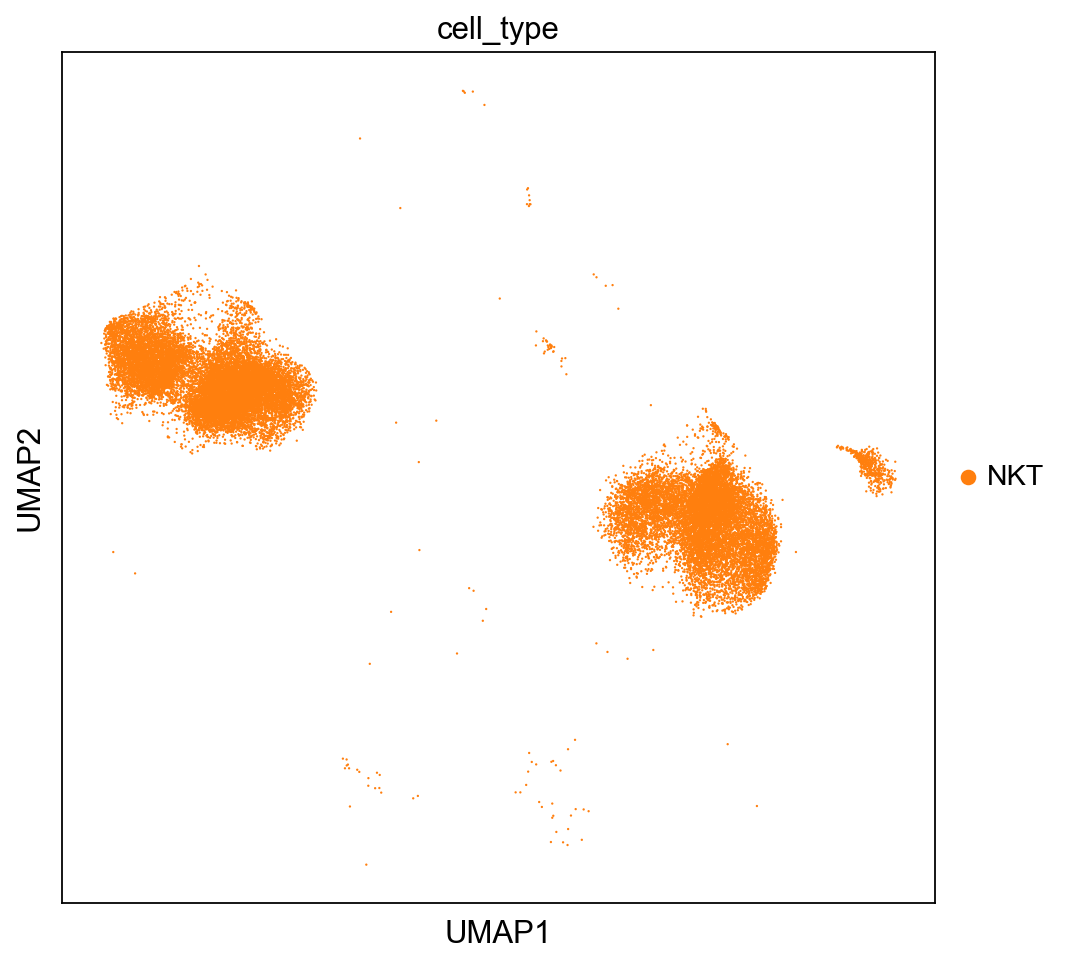

In [105]:
#latent space?

sc.pl.umap(adata_nkt, color = ['cell_type'], color_map = 'viridis')

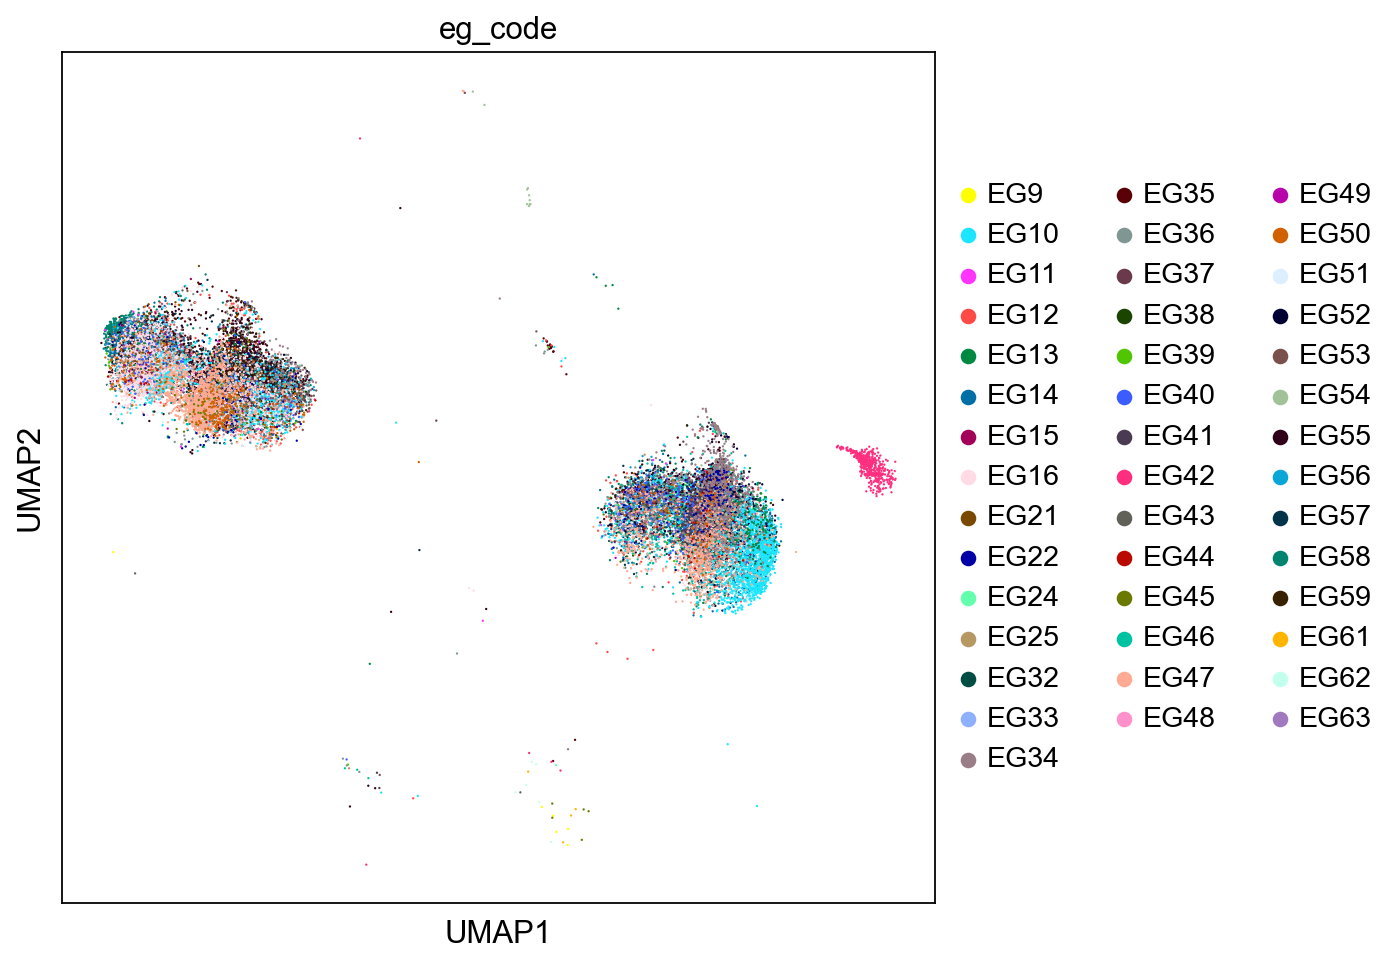

In [106]:
#latent space?

sc.pl.umap(adata_nkt, color = ['eg_code'], color_map = 'viridis')

- EG42 is a AML case, 94% of the cells are blasts

In [107]:
#selecting one sample from Neurips, only NKT cells

eg=adata_nkt[adata_nkt.obs['POOL'] == "EG35"]

In [108]:
eg_all=adata[adata.obs['POOL'] == "EG35"]

In [109]:
eg

View of AnnData object with n_obs × n_vars = 1226 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group', 'CD19', 'CD10', 'CD20', 'CD3', 'CD2', 'CD11b', 'HLADR', 'CD38_prot', 'CD11c', 'CD7', 'CD45', 'CD33', 'CD81', 'CD73', 'CD123', 'CD14', 'CD45RA', 'CD45RO', 'CD4', 'CD8a', 'CD197', 'CD127', 'CD56', 'CD5', 'CD15', 'CD64', 'CD117', 'CD24', 'CD44', 'CD58', 'CD66ace', 'CD13', 'CD34_prot'
    uns: 'neighbors', 'new_cell_type_colors', 'umap', 'cell_type_colors', 'eg_code_colors'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    obsp: 'connectivities', 'distances'

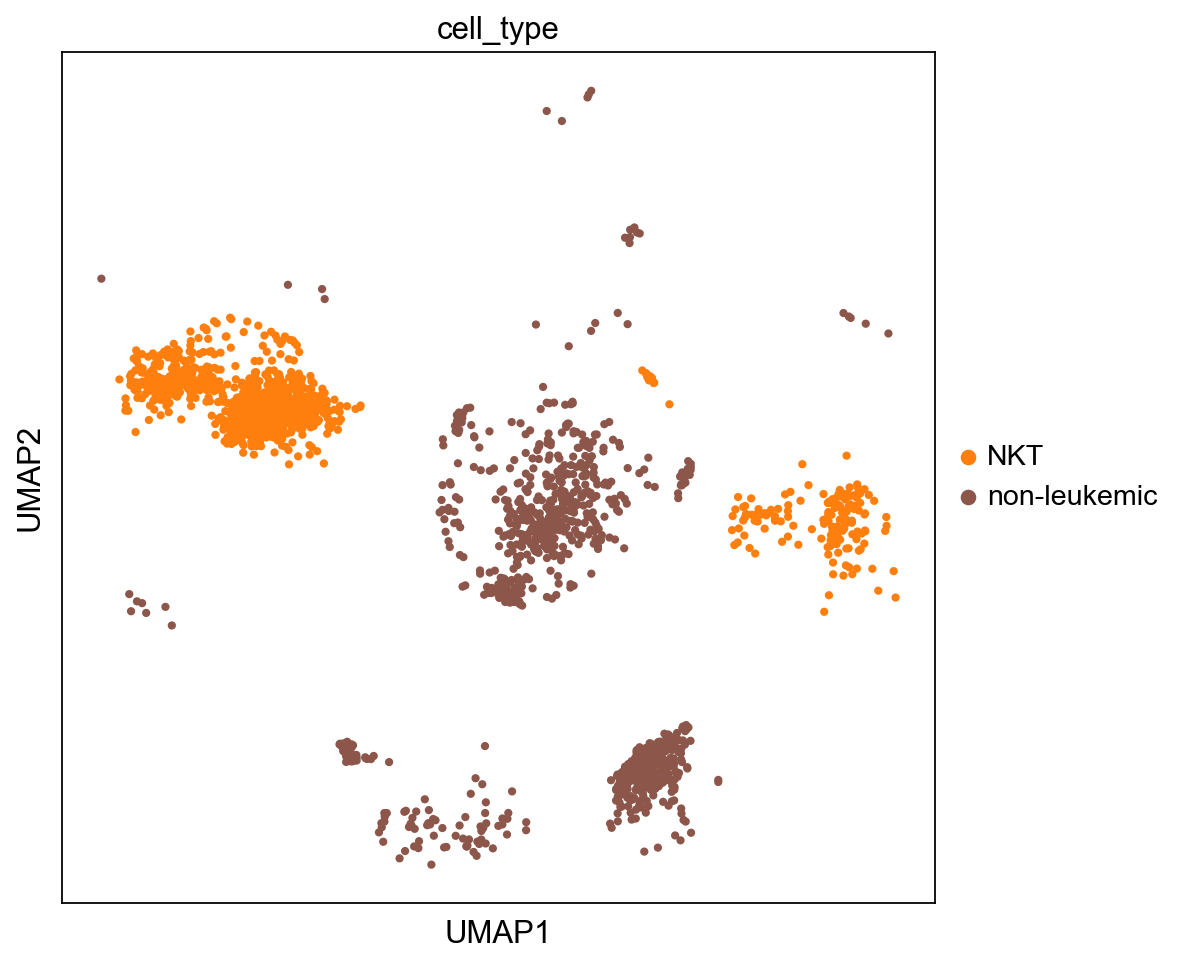

In [110]:
#all cells from selected sample

sc.pl.umap(eg_all, color= "cell_type", color_map= 'viridis')

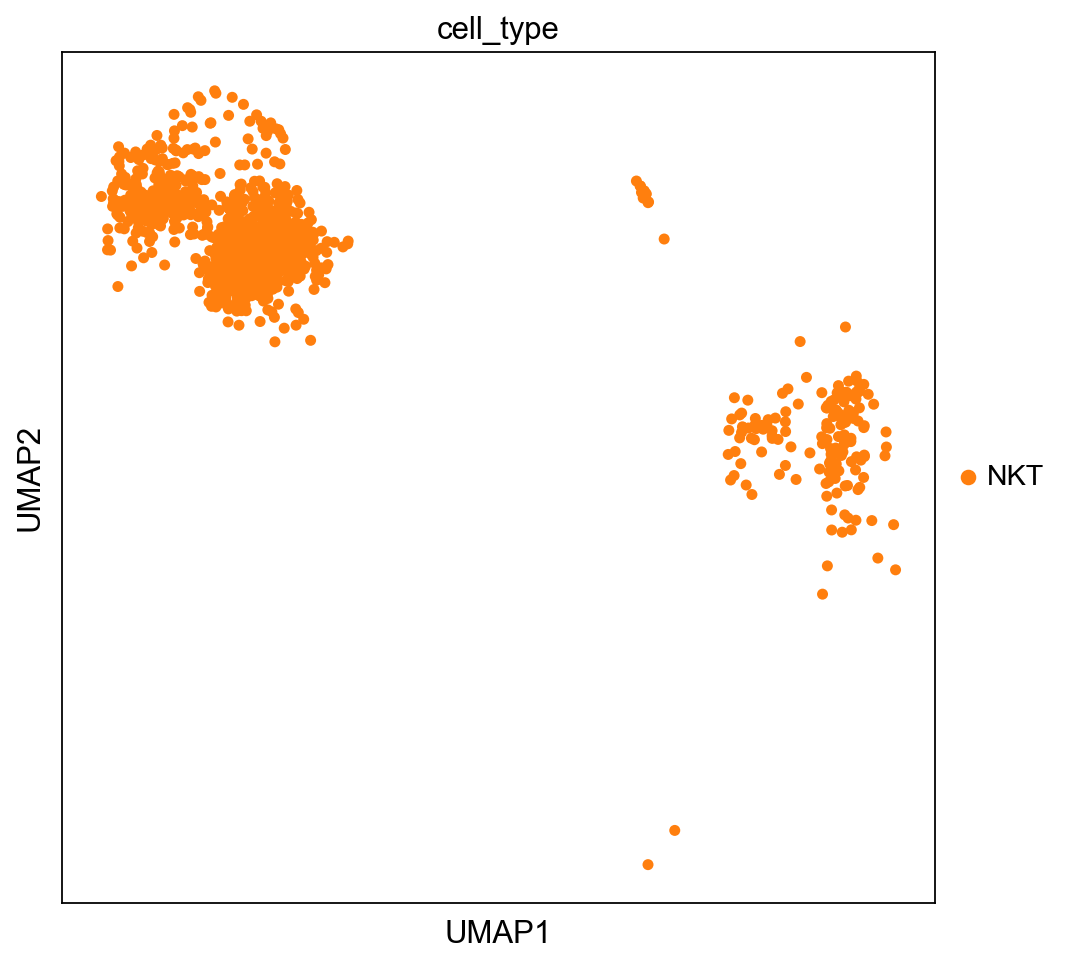

In [111]:
#NKT cells from selected sample

sc.pl.umap(eg, color= "cell_type", color_map= 'viridis')

In [112]:
#List of NK cell markers

nk_markers = ['CD52',
 'CD127',
 'CD226',
 'CD335',
 'CD195',
 'CD56',
 'CD5',
 'CD69',
 'CD94',
 'CD16',
 'CD122',
 'CD57',
 'CD38_prot',
 'CD158e1',
 'CD34_prot',
 'TIGIT',
 'CD314',
 'CD7',
 'CD62L',
 'CD2',
 'CD27',
 'CX3CR1',
 'CD161',
 'CD155',
 'CD158b']

In [113]:
#check which markers were used in Easigenomics

listOfmarkers= nk_markers

is_nk = []

for x in listOfmarkers:
    if x in prot.columns:
        is_nk.append(x)


In [114]:
is_nk

['CD127', 'CD56', 'CD5', 'CD38_prot', 'CD34_prot', 'CD7', 'CD2']

In [ ]:
#Computing a neighborhood of observations using latent space, object with only NKT

sc.pp.neighbors(eg, use_rep="X_totalVI")   

sc.tl.umap(eg)

#Computing a neighborhood of observations using latent space, object with all cell types

sc.pp.neighbors(eg_all, use_rep="X_totalVI")   

sc.tl.umap(eg_all)

Surface protein markers, NKT cells


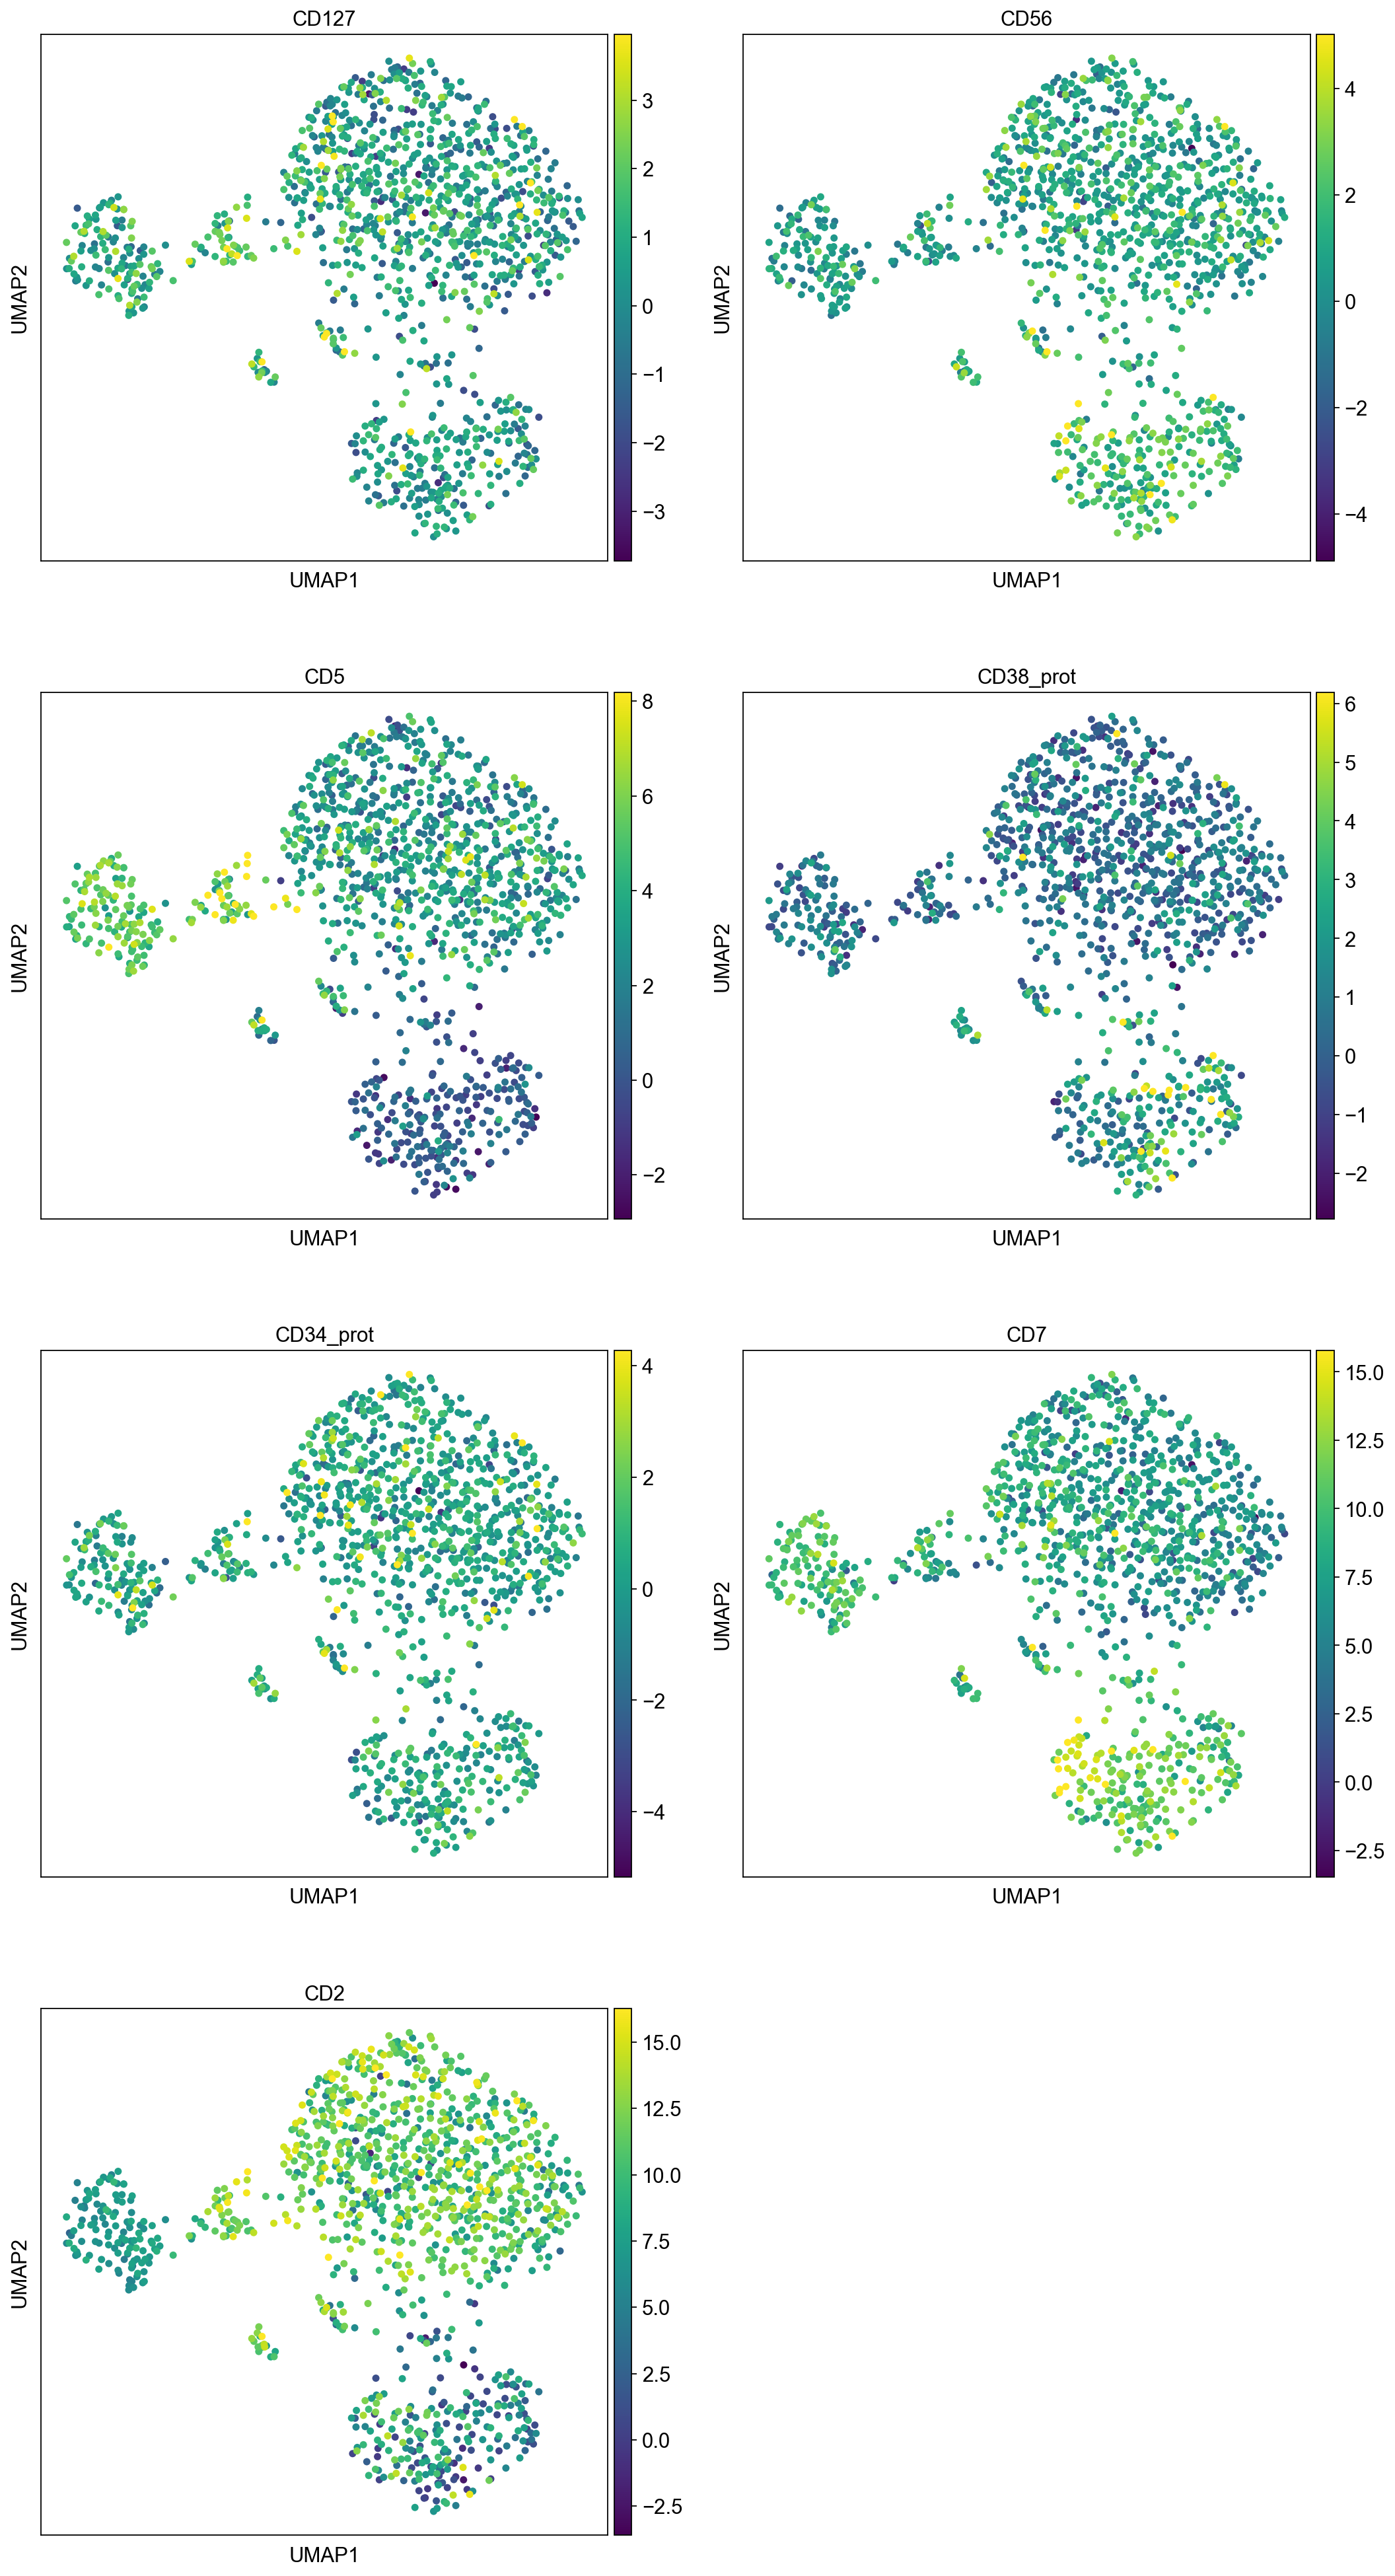

Surface protein markers, all cell types


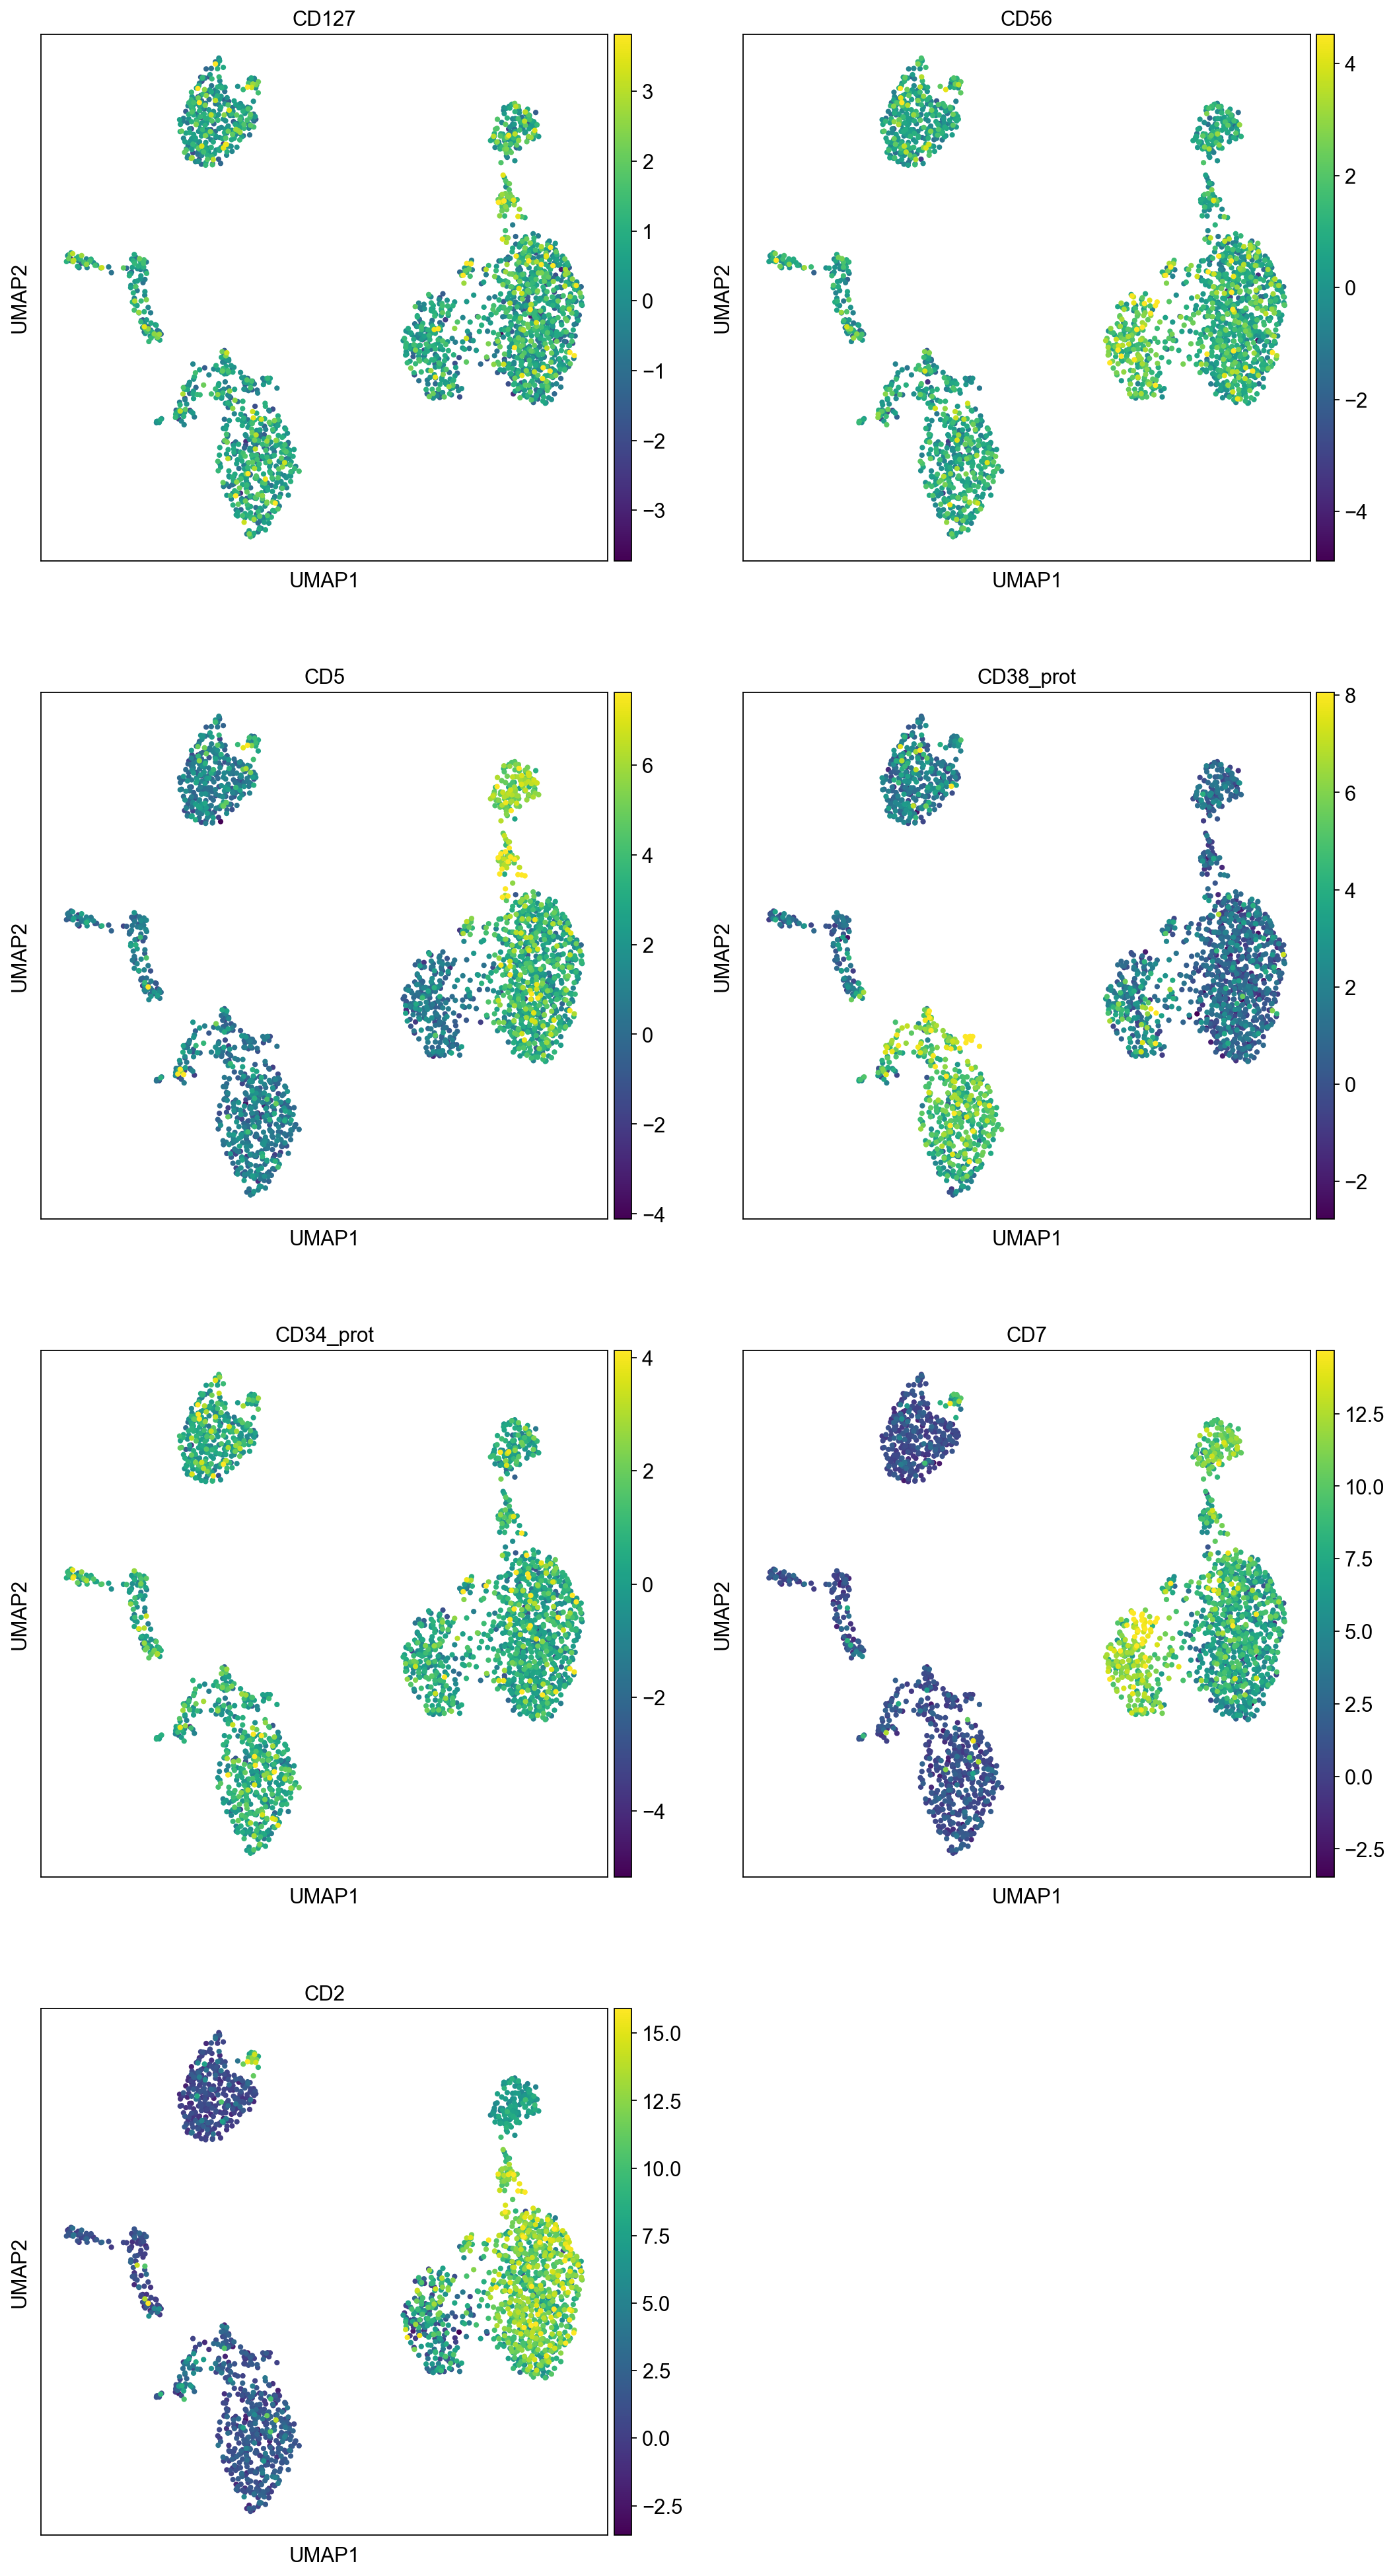

In [121]:

sc.set_figure_params(figsize=(7, 7))

#Surface protein

print("Surface protein markers, NKT cells")
sc.pl.umap(eg, color = is_nk, vmax="p99", color_map = 'viridis', ncols=2)


print("Surface protein markers, all cell types")
sc.pl.umap(eg_all, color = is_nk, vmax="p99", color_map = 'viridis', ncols=2)




Surface protein markers, only NKT cells


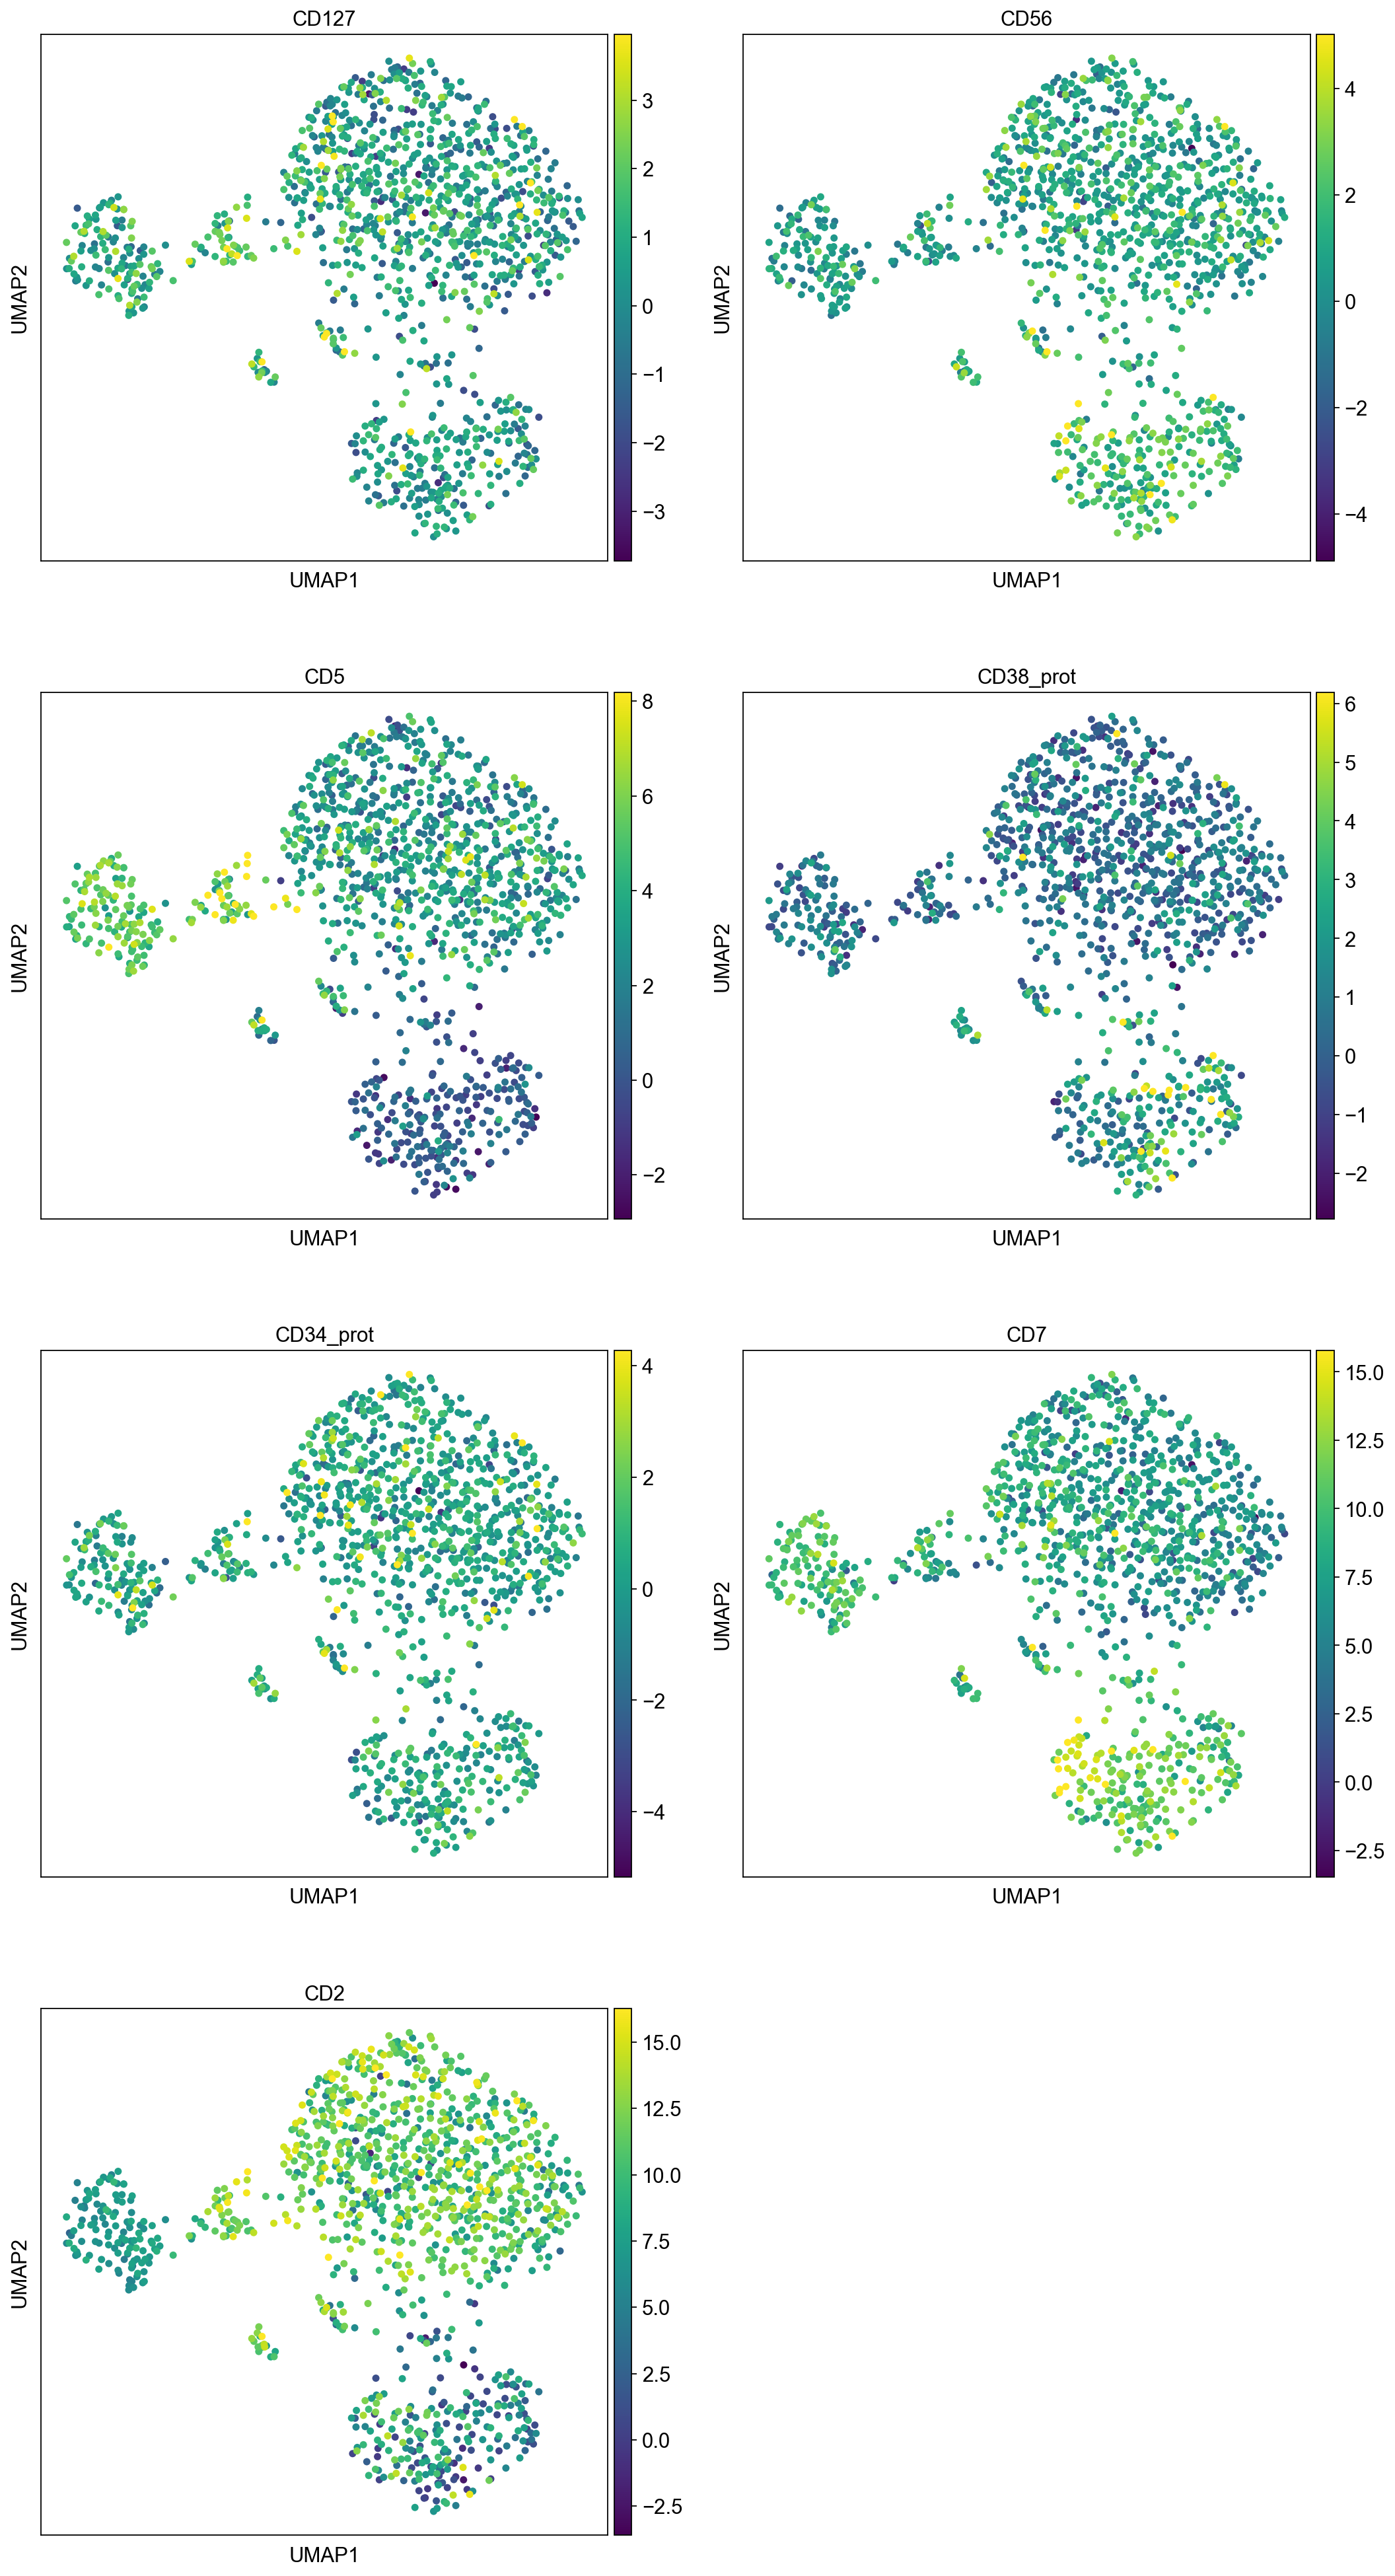

Surface protein markers, all cell types


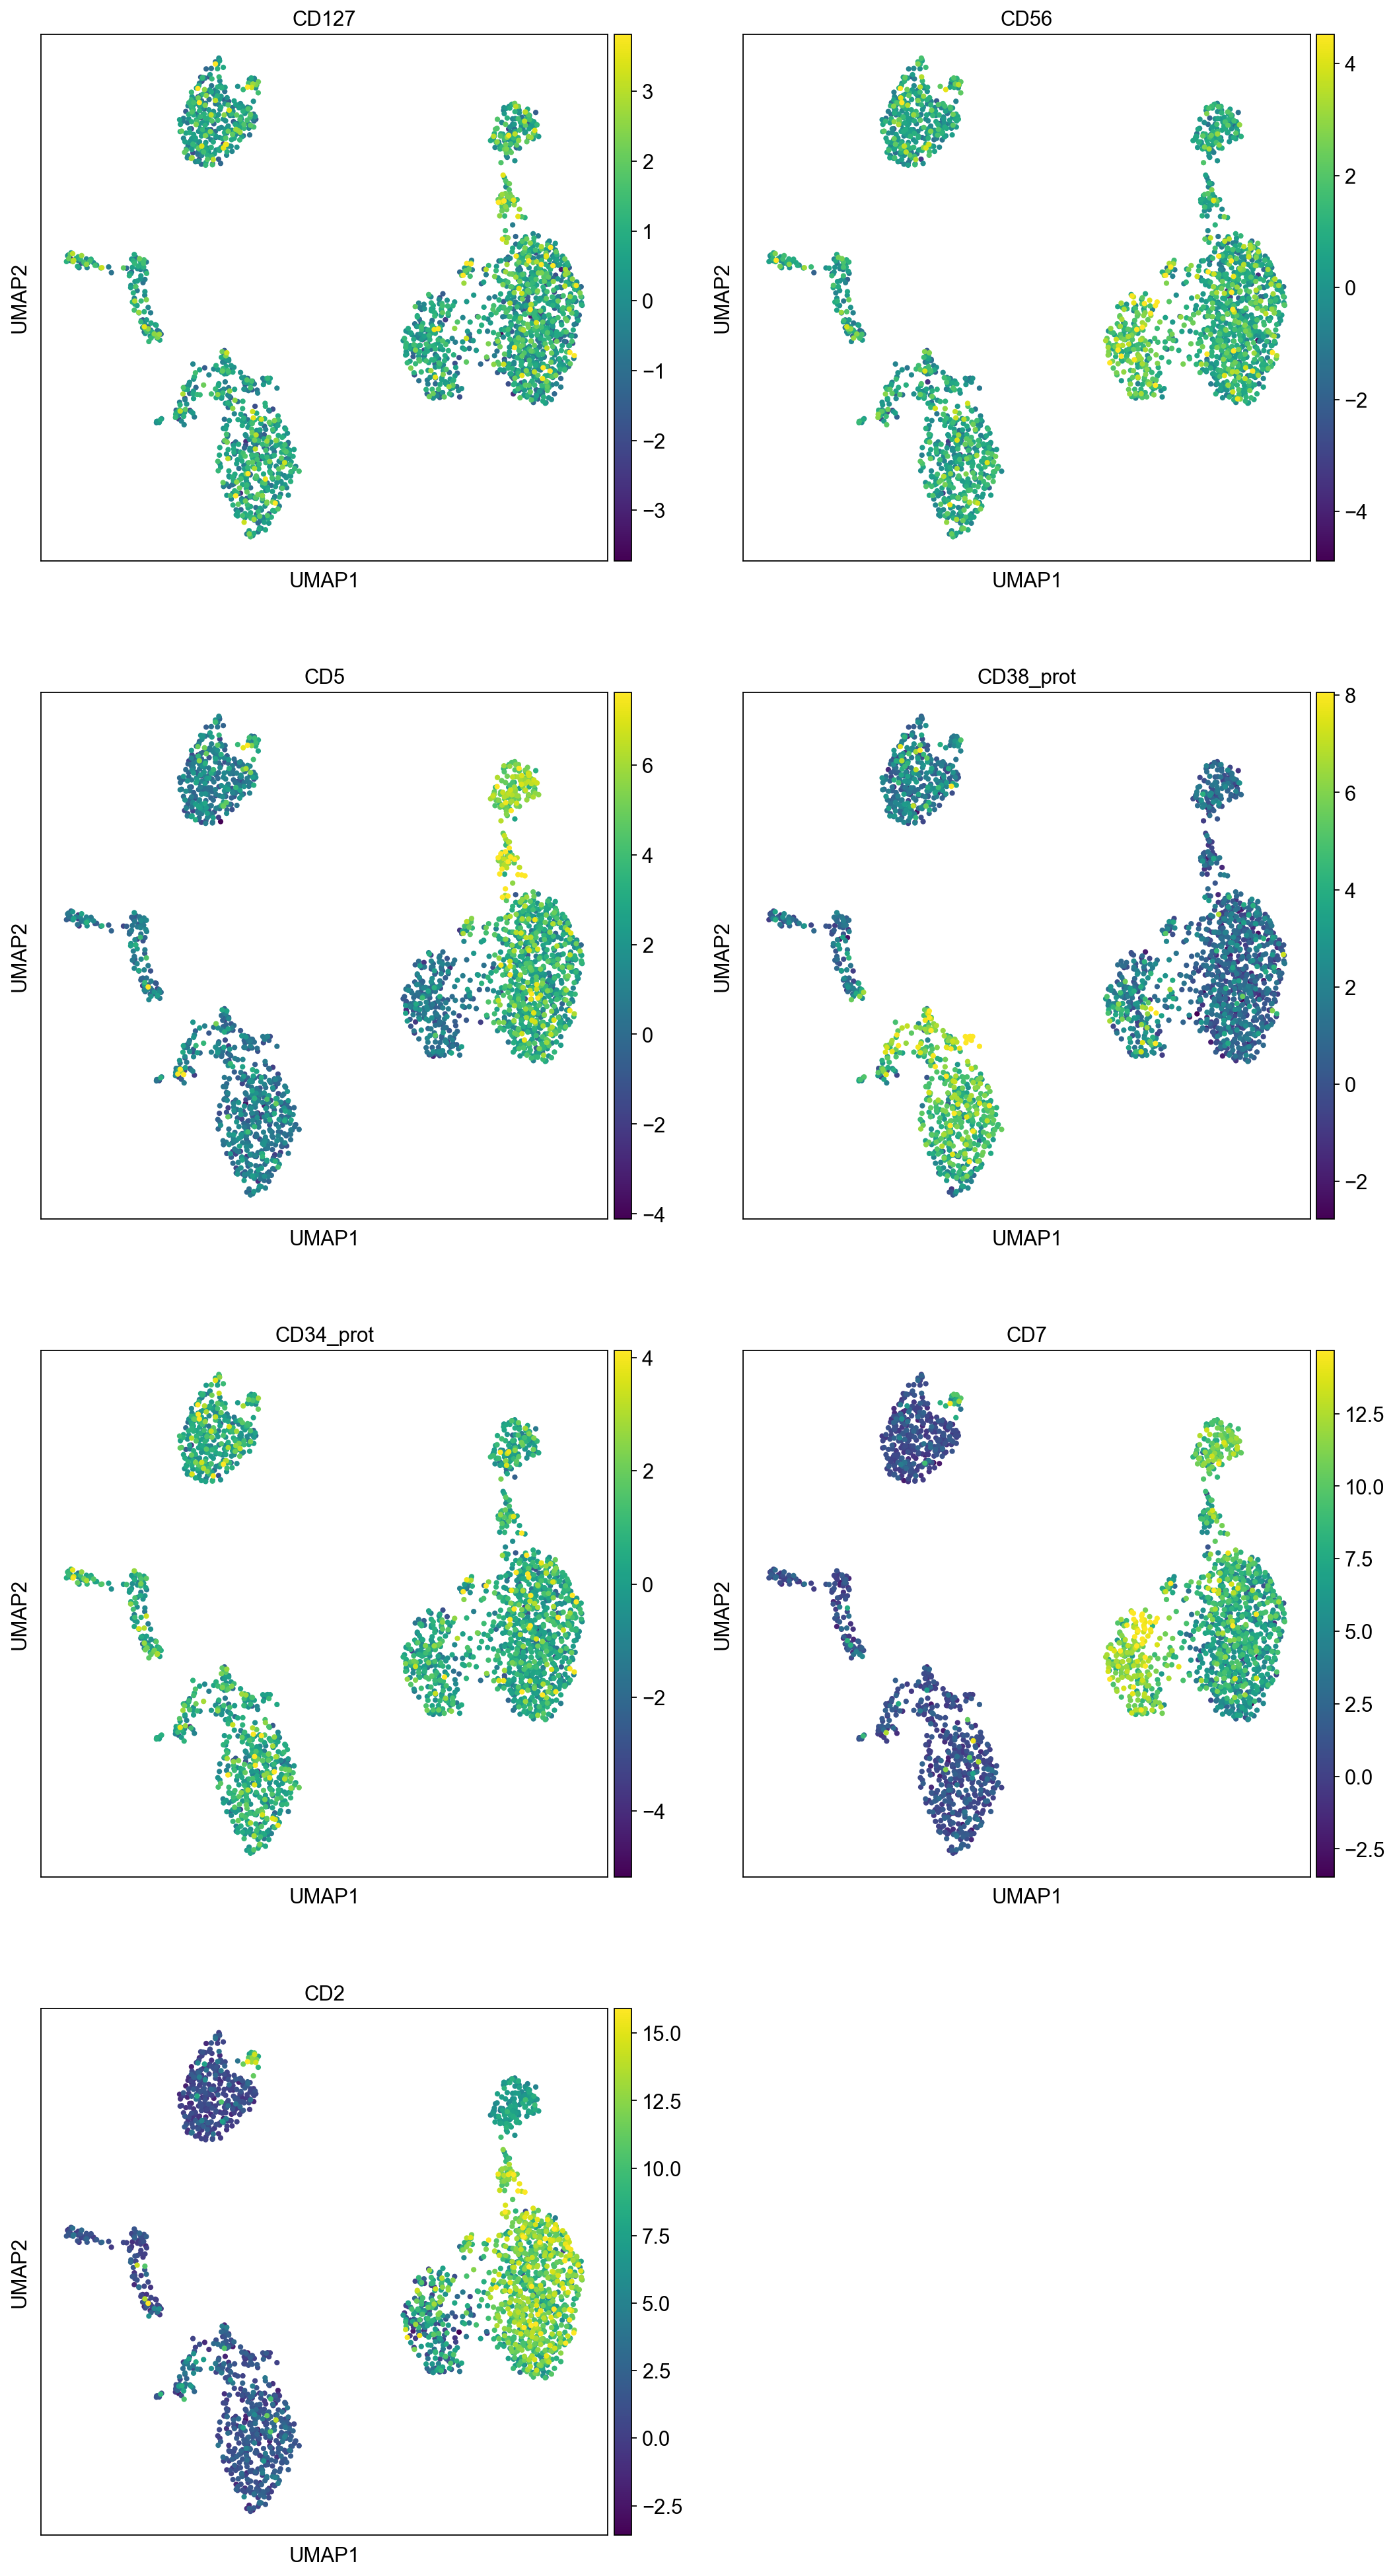

In [120]:
print("Surface protein markers, only NKT cells")
sc.pl.umap(eg, color = is_nk, vmax="p99", color_map = 'viridis', ncols=2)

print("Surface protein markers, all cell types")
sc.pl.umap(eg_all, color = is_nk, vmax="p99", color_map = 'viridis', ncols=2)


- Signal of CD56, which is known NK cell specific markers, is very low and basically same as background signal, so NK cells can't really be distinguished from other cells by using CD56. 
- The location of the signal from other markers varies indicating that markers are not NK cell specific. 